In [38]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [39]:
%cd /gdrive/MyDrive/dataset

/gdrive/MyDrive/dataset


In [40]:
import pandas as pd

In [41]:
df=pd.read_csv('Admission_Predict.csv')

In [42]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [43]:
#del df['Unnamed: 10']

In [44]:
df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [45]:
df=df.fillna(method ='pad')
df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [65]:
y=df['University Rating']
y.head(3)

0    4
1    4
2    3
Name: University Rating, dtype: int64

In [47]:
x=df.drop('University Rating',inplace=False,axis=1)
x.head(3)

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4.5,4.5,9.65,1,0.92
1,2,324,107,4.0,4.5,8.87,1,0.76
2,3,316,104,3.0,3.5,8.00,1,0.72


In [48]:
df['University Rating'].unique

<bound method Series.unique of 0      4
1      4
2      3
3      3
4      2
      ..
395    3
396    3
397    4
398    3
399    4
Name: University Rating, Length: 400, dtype: int64>

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y)

In [50]:
x_train.head()

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
70,71,332,118,5.0,5.0,9.64,1,0.94
331,332,311,105,3.0,2.0,8.12,1,0.73
96,97,306,100,3.0,3.0,8.00,0,0.48
165,166,322,110,4.5,4.0,8.97,0,0.78
175,176,320,111,4.5,3.5,8.87,1,0.85


In [51]:
y_train.head()

70     5
331    2
96     2
165    5
175    4
Name: University Rating, dtype: int64

In [52]:
x_test.head()

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
231,232,319,106,3.5,2.5,8.33,1,0.74
26,27,322,109,4.5,3.5,8.80,0,0.76
310,311,320,104,3.0,3.5,8.74,1,0.76
304,305,313,106,2.5,2.0,8.43,0,0.62
129,130,333,118,5.0,5.0,9.35,1,0.92


In [53]:
y_test.head()

231    3
26     5
310    3
304    2
129    5
Name: University Rating, dtype: int64

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
from sklearn.metrics import f1_score
f1 = []
n_neighbours = [i for i in range(2,20)]
for i in range(2,20):
  model = KNeighborsClassifier(n_neighbors=i, algorithm='auto')
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  f1.append(f1_score(y_test, y_pred, average='weighted'))
  print("the f1 sscore when n_neighbors = {} is {}".format(i,f1_score(y_test, y_pred, average='weighted')))

the f1 sscore when n_neighbors = 2 is 0.43829907797120915
the f1 sscore when n_neighbors = 3 is 0.4190861195835758
the f1 sscore when n_neighbors = 4 is 0.35554858745742335
the f1 sscore when n_neighbors = 5 is 0.3906655674241881
the f1 sscore when n_neighbors = 6 is 0.3656573498964803
the f1 sscore when n_neighbors = 7 is 0.3317974513749162
the f1 sscore when n_neighbors = 8 is 0.3684004884004884
the f1 sscore when n_neighbors = 9 is 0.3701851851851852
the f1 sscore when n_neighbors = 10 is 0.36342460317460323
the f1 sscore when n_neighbors = 11 is 0.37670649350649354
the f1 sscore when n_neighbors = 12 is 0.3561590909090909
the f1 sscore when n_neighbors = 13 is 0.36475490774285957
the f1 sscore when n_neighbors = 14 is 0.3639264968898878
the f1 sscore when n_neighbors = 15 is 0.39038427619851773
the f1 sscore when n_neighbors = 16 is 0.3427023572979859
the f1 sscore when n_neighbors = 17 is 0.3450675420051185
the f1 sscore when n_neighbors = 18 is 0.34024087221095334
the f1 sscore w

In [56]:
import matplotlib.pyplot as plt

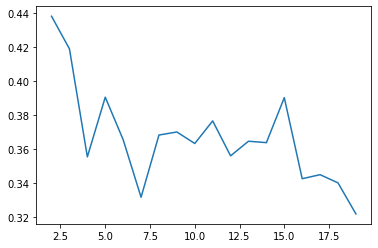

In [57]:
plt.plot(n_neighbours,f1)

In [58]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [59]:
from sklearn.svm import LinearSVC

In [60]:
svm_clf=LinearSVC(multi_class='crammer_singer')
svm_clf.fit(x_train,y_train)
y_pred=svm_clf.predict(x_test)
svm_clf_f1=f1_score(y_test,y_pred,average='weighted')
print(svm_clf_f1)

0.22274181264280277


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [61]:
import pickle
saved_model=pickle.dumps(svm_clf)
clf2=pickle.loads(saved_model)

In [62]:
from sklearn.naive_bayes import GaussianNB

In [66]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
gnb_f1=f1_score(y_test,y_pred,average='weighted')
print("Naive Bayes Classifier is ",gnb_f1)

Naive Bayes Classifier is  0.5544043588843162
